In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import seaborn as sns
train = pd.read_csv("train.csv")
train.head(10)

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
5,2023-04,bukit panjang,654,Senja Road,executive,premium apartment,130.0,yes,2001,1.387847,103.764249,0.0,saujana,bukit panjang,west region,2300
6,2021-01,sengkang,407b,fernvale road,5 room,premium apartment,110.0,yes,2005,1.388997,103.875148,0.0,fernvale,sengkang,north-east region,2100
7,2022-06,ang mo kio,223,ang mo kio avenue 1,3-room,new generation,67.0,yes,1978,1.366048,103.838123,0.0,shangri-la,ang mo kio,north-east region,2300
8,2021-10,bishan,149,bishan street 11,4 room,simplified,84.0,yes,1987,1.344279,103.855556,0.0,bishan east,bishan,central region,2100
9,2021-04,punggol,133,edgedale plains,5 room,premium apartment,112.0,yes,2003,1.392832,103.910620,0.0,punggol field,punggol,north-east region,2100


In [3]:
schoolsDf = pd.read_csv("auxiliary-data/sg-primary-schools.csv")
schoolsDf.head()

,name,latitude,longitude
0,Admiralty Primary School,1.454038,103.817436
1,Ahmad Ibrahim Primary School,1.433153,103.832942
2,Ai Tong School,1.360583,103.833020
3,Alexandra Primary School,1.291334,103.824425
4,Anchor Green Primary School,1.390370,103.887165


In [97]:
train["schools_in_3km"] = train["longitude"]
train["nearest_school_name"] = train["longitude"]
train.head(5)

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,schools_in_3km,nearest_school_name
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,103.738630,103.738630
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,103.938717,103.938717
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,103.845643,103.845643
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,103.962894,103.962894
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,103.863341,103.863341


In [101]:
from tqdm import tqdm

for index in tqdm(train.index):
    latitude, longitude = train.loc[index, "latitude"], train.loc[index, "longitude"]
    nearest_school_dis = 1000000000
    nearest_school_name = "None"
    schools_3km = 0
    for ind in schoolsDf.index:
        lat2, long2 = schoolsDf.loc[ind, "latitude"], schoolsDf.loc[ind, "longitude"]
        # Spherical distance between two locations, using the longitude and the latitude to calculate.
        distance = geodesic((latitude, longitude), (lat2, long2)).kilometers
        if distance < 3:
            schools_3km += 1
        if nearest_school_dis > distance:
            nearest_school_dis = distance
            nearest_school_name = schoolsDf.loc[ind, "name"]
    train.loc[index, "schools_in_3km"] = schools_3km
    train.loc[index, "nearest_school_name"] = nearest_school_name
    

  0%|                                                                                        | 0/60000 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████| 60000/60000 [34:02<00:00, 29.37it/s]


In [4]:
train = pd.read_csv("train_with_schools.csv")

In [5]:
school_info_slice = train[["schools_in_3km", "nearest_school_name", "monthly_rent"]]
school_info_slice.head()

,schools_in_3km,nearest_school_name,monthly_rent
0,13.0,Yuhua Primary School,1600
1,18.0,St. Anthony's Canossian Primary School,2250
2,16.0,CHIJ Primary (Toa Payoh),1900
3,13.0,Pasir Ris Primary School,2850
4,16.0,Bendemeer Primary School,2100


In [6]:
corrolation_school = school_info_slice["schools_in_3km"].corr(school_info_slice["monthly_rent"])
corrolation_school

-0.024471869768130153

In [7]:
groups_schools = school_info_slice.groupby("nearest_school_name").mean()
groups_schools = groups_schools["monthly_rent"].to_frame()
groups_schools.index
# for name in school_info_slice["nearest_school_name"].unique():
#     print(groups_schools.get_group(name))

Index(['Admiralty Primary School', 'Ahmad Ibrahim Primary School',
       'Ai Tong School', 'Alexandra Primary School',
       'Anchor Green Primary School', 'Anderson Primary School',
       'Ang Mo Kio Primary School', 'Angsana Primary School',
       'Beacon Primary School', 'Bedok Green Primary School',
       ...
       'Xishan Primary School', 'Yangzheng Primary School',
       'Yew Tee Primary School', 'Yio Chu Kang Primary School',
       'Yu Neng Primary School', 'Yuhua Primary School',
       'Yumin Primary School', 'Zhangde Primary School',
       'Zhenghua Primary School', 'Zhonghua Primary School'],
      dtype='object', name='nearest_school_name', length=164)

In [8]:
school_loc_rent = groups_schools.merge(schoolsDf, left_on=groups_schools.index, right_on="name")
school_loc_rent

,monthly_rent,name,latitude,longitude
0,2456.285714,Admiralty Primary School,1.454038,103.817436
1,2302.351738,Ahmad Ibrahim Primary School,1.433153,103.832942
2,2554.597701,Ai Tong School,1.360583,103.833020
3,2678.214286,Alexandra Primary School,1.291334,103.824425
4,2572.843450,Anchor Green Primary School,1.390370,103.887165
...,...,...,...,...
159,2716.648352,Yuhua Primary School,1.342802,103.741106
160,2533.175355,Yumin Primary School,1.351292,103.950462
161,3096.222455,Zhangde Primary School,1.284212,103.825952
162,2467.754569,Zhenghua Primary School,1.379549,103.769314


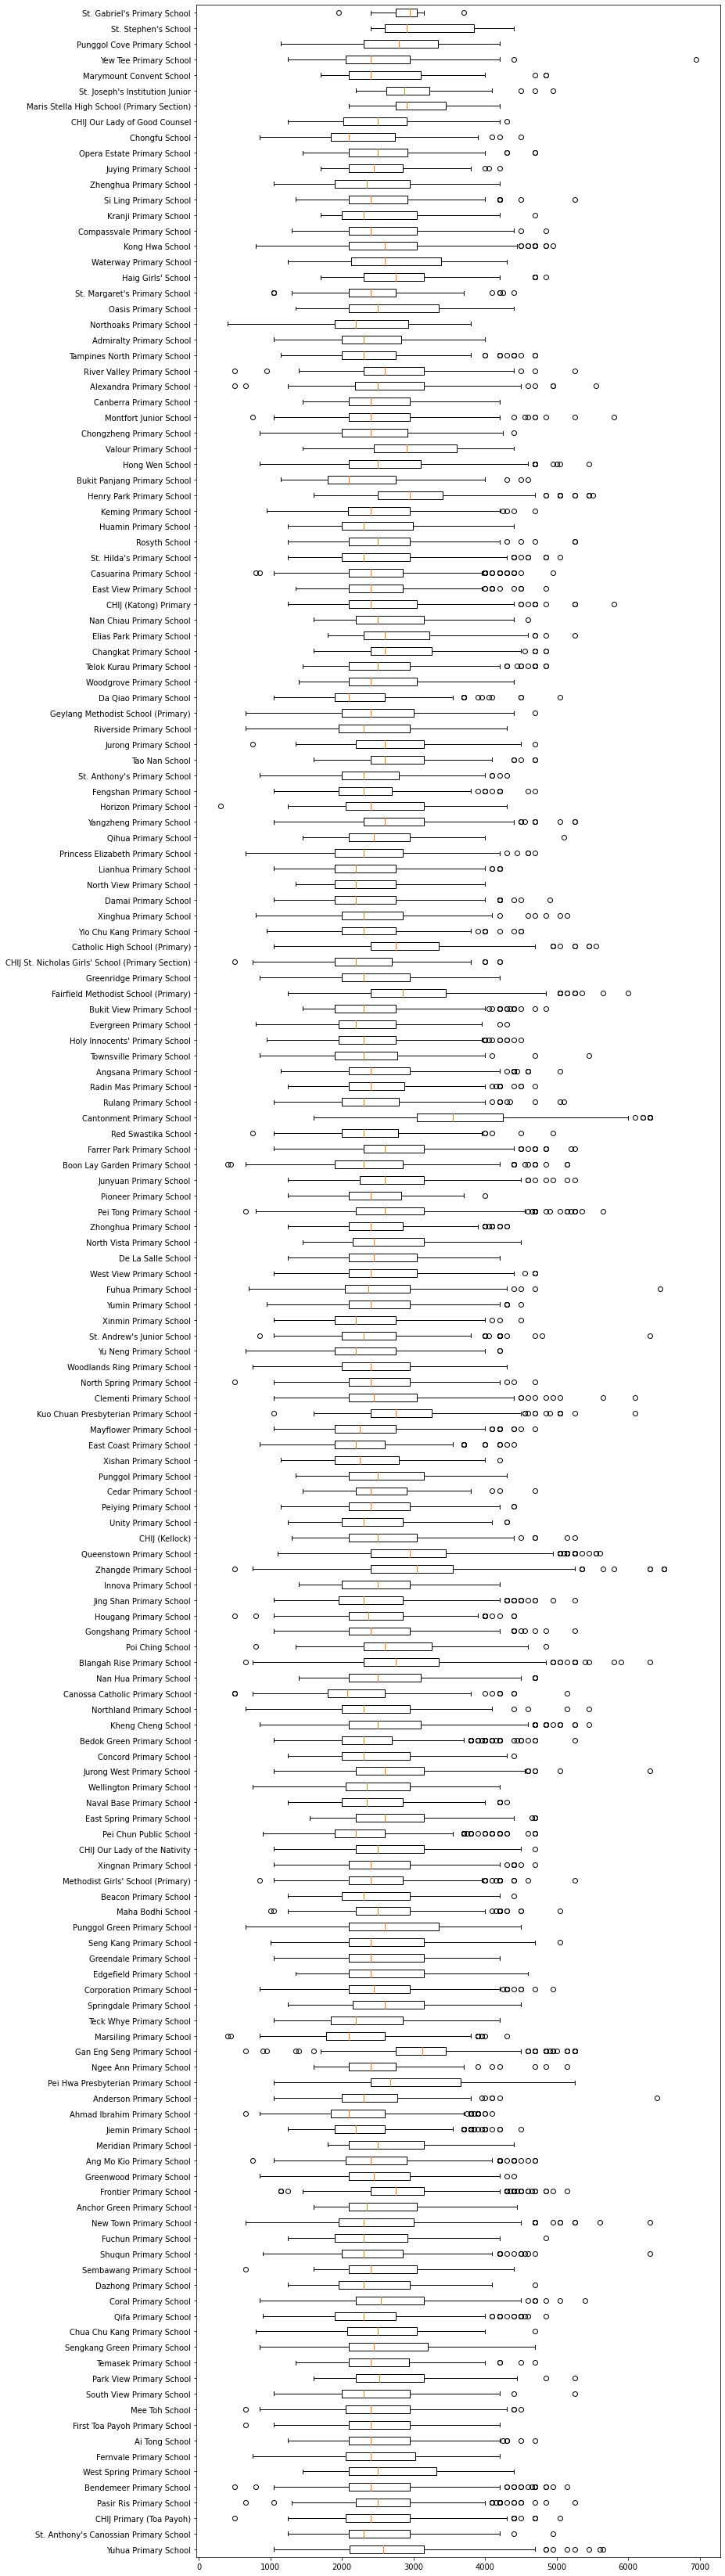

In [9]:
plt.figure(figsize=(12, 60))
schools = school_info_slice["nearest_school_name"].unique()
boxplot_data = []
for school in schools:
    boxplot_data.append(school_info_slice[school_info_slice["nearest_school_name"] == school]["monthly_rent"])

plt.boxplot(boxplot_data, labels=schools, vert=False)
plt.show()

In [10]:
import folium
# The centroid of the map
m = folium.Map(location=[school_loc_rent['latitude'].mean(), school_loc_rent['longitude'].mean()], zoom_start=12)
for index, row in school_loc_rent.iterrows():
    marker = folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=row['name'],  # Mouse-on marker
    )
    popup = folium.Popup(f"Rental: {row['monthly_rent']}", parse_html=True,  permanent=True)
    popup.add_to(marker)
    marker.add_to(m)

m.save('school_map_with_price.html')  # HTML
m